## 1.产品简介：
    1.利用文本挖掘技术，对碎片化，非结构化的电商网站评论数据进行数据清洗与处理,转换位结构化数据
    2.参考知网发布的情感分析词语集，统计评论数据的正负情感指数，然后进行情感分析，通过词云图直观查看正负评论的关键词
    3.比较“机器挖掘的正负情感”与“人工打标签的正负情感”，精度达到89%
    4.采用lda主题模型提取评论关键信息，以了解用户的需求、意见、购买原因、产品的优缺点等

#### 说明：本案例侧重分析思路及代码实现，不深入展开分析结果的业务解释与决策指导！
    参考材料《Python数据分析与挖掘实战》

## 2.框架
    工具准备
    一、导入数据
    二、数据预处理
        （一）去重
        （二）数据清洗
        （三）分词、词性标注、去除停用词、词云图
    三、模型构建
        （一）决策树
        （二）情感分析
        （三）基于LDA模型的主题分析

###  一、导包

In [1]:
import os #获取文件/文档信息路径的获取
import numpy as np #完成基础数据计算
import pandas as pd #数据挖掘，数据分析、数据清洗功能
import matplotlib.pyplot as plt #绘制图形
from  matplotlib.pylab import style  #自定义图表风格
%pip install re 
import re #数据处理时候的正则表达式
%pip install seaborn
import seaborn as sns #数据可视化库，封装在matplotlib库上的可视化库
import jieba #中文分词用的
import jieba.posseg as psg #jieba分词时用posseg进行词性标注
import wordcloud  #绘制词云图
from wordcloud import WordCloud,ImageColorGenerator #词云对象库


#以下这个是可以一行多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

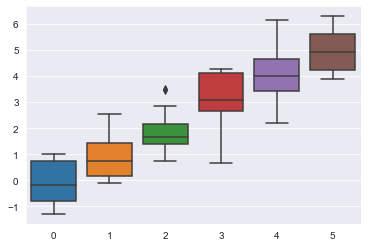

In [2]:
#了解seaborn库
sns.set_style('darkgrid')
data=np.random.normal(size=(20,6))+np.arange(6)
sns.boxplot(data=data)

### 导入商品评论数据

In [3]:
raw_data=pd.read_csv('Z:/大四/python/week2/data/reviews.csv')
raw_data.shape #查看表结构

(2000, 5)

In [4]:
raw_data.info()#数据框结构
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        2000 non-null   object
 1   creationTime   2000 non-null   object
 2   nickname       2000 non-null   object
 3   referenceName  2000 non-null   object
 4   content_type   2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


,content,creationTime,nickname,referenceName,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos


In [5]:
#查看列标签
raw_data.columns
#统计汇总各列
for cate in['creationTime','nickname','referenceName','content_type']:
    print(raw_data[cate].value_counts())

Index(['content', 'creationTime', 'nickname', 'referenceName', 'content_type'], dtype='object')

2016-06-24 22:35:42    2
2016-06-20 16:03:00    2
2015-06-25 17:36:36    2
2016-06-24 17:42:26    2
2017-10-20 09:53:21    1
                      ..
2017-10-19 17:13:54    1
2016-06-22 23:26:24    1
2017-10-09 10:02:48    1
2017-09-23 21:27:08    1
2017-03-03 23:12:25    1
Name: creationTime, Length: 1996, dtype: int64
j***1    34
j***6    30
j***2    25
j***b    25
j***8    23
         ..
乖***隆     1
k***I     1
砍***号     1
辽***5     1
z***g     1
Name: nickname, Length: 1190, dtype: int64
美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y)    2000
Name: referenceName, dtype: int64
neg    1000
pos    1000
Name: content_type, dtype: int64


In [6]:
for cate in['creationTime']:
    print(raw_data[cate].value_counts())

2016-06-24 22:35:42    2
2016-06-20 16:03:00    2
2015-06-25 17:36:36    2
2016-06-24 17:42:26    2
2017-10-20 09:53:21    1
                      ..
2017-10-19 17:13:54    1
2016-06-22 23:26:24    1
2017-10-09 10:02:48    1
2017-09-23 21:27:08    1
2017-03-03 23:12:25    1
Name: creationTime, Length: 1996, dtype: int64


## 数据预处理


### (一)去重 

In [7]:
#做一个数据集的备份
reviews=raw_data.copy()
reviews.head()

,content,creationTime,nickname,referenceName,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos


In [8]:
#提取我们需要处理的列信息（评语和人工标签）
reviews=reviews[['content','content_type']]
reviews.head()

,content,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,pos
1,安装师傅很给力，热水器也好用，感谢美的。,pos
2,还没安装，基本满意,pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,pos


In [9]:
#取重
#1.去重前的结构信息
print('去重前：',reviews.shape[0])
#2.去重后的机构信息
reviews=reviews.drop_duplicates()
print('去重后：',reviews.shape[0])


去重前： 2000
去重后： 1974


## （二）数据清洗
    去掉评论中与情感无关的词比如，数字、品牌、字母

In [10]:
#1.清洗之前
content=reviews['content']
for i in range(4,10):
    print(content[i])
    print("-"*100)

用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮我联系安装，非常感谢售后大姐的服务！下次购买还会考虑美的！
----------------------------------------------------------------------------------------------------
物美价廉啊，特别划算的，而且加热速度快。家里用着不错特别方便
----------------------------------------------------------------------------------------------------
价格合理，配置挺高，物美价值
----------------------------------------------------------------------------------------------------
老师按装是快的，装修中。没试。希望是正常的！
----------------------------------------------------------------------------------------------------
五分是习惯
送的快，装的也快，很好，不过装修进行中，为了吊顶只装了热水器，其它后话吧。
我也是醉了，热水器遥控器没电池，还是安装哥车里有一个备用的给装上了。
要赠送的电动牙刷，空气净化器等待配送中&hellip;&hellip;。
一天时间冰箱降100、洗衣机降40、热水器降100、小厨宝降30、烟灶套降100。不过客服说上报解决，电话通知等待中&hellip;&hellip;
----------------------------------------------------------------------------------------------------
安装的小哥非常好，工作很尽心，我们家是老房子，安装比一般家要费力。安装的非常不错。因为整栋楼要用热水，裙子只能这样装。给小哥点个赞。热水器已经买二个了，一如既往地好用。美的大品牌，质量非常好
---------------------------------------------------------------

In [11]:
info=re.compile('[0-9a-zA-Z]|京东|美的|热水器|')#定义正则表达式
content=content.apply(lambda x:info.sub('',x))#用空格替换所有匹配的信息 sub方法提供一个替换值
for i in range(4,10):
    print(content[i])
    print("-"*100)

用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮我联系安装，非常感谢售后大姐的服务！下次购买还会考虑！
----------------------------------------------------------------------------------------------------
物美价廉啊，特别划算的，而且加热速度快。家里用着不错特别方便
----------------------------------------------------------------------------------------------------
价格合理，配置挺高，物美价值
----------------------------------------------------------------------------------------------------
老师按装是快的，装修中。没试。希望是正常的！
----------------------------------------------------------------------------------------------------
五分是习惯
送的快，装的也快，很好，不过装修进行中，为了吊顶只装了，其它后话吧。
我也是醉了，遥控器没电池，还是安装哥车里有一个备用的给装上了。
要赠送的电动牙刷，空气净化器等待配送中&;&;。
一天时间冰箱降、洗衣机降、降、小厨宝降、烟灶套降。不过客服说上报解决，电话通知等待中&;&;
----------------------------------------------------------------------------------------------------
安装的小哥非常好，工作很尽心，我们家是老房子，安装比一般家要费力。安装的非常不错。因为整栋楼要用热水，裙子只能这样装。给小哥点个赞。已经买二个了，一如既往地好用。大品牌，质量非常好
----------------------------------------------------------------------------------------------------


## (三)分词、词性标注、去除停用词、词云图

### 1.分词 组成的是由元组组成的list

In [12]:
seg_content=content.apply(lambda s:[(x.word,x.flag) for x in psg.cut(s)])
seg_content.shape
print(seg_content[5])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\bw\AppData\Local\Temp\jieba.cache
Loading model cost 1.327 seconds.
Prefix dict has been built successfully.


(1974,)

[('物美价廉', 'l'), ('啊', 'zg'), ('，', 'x'), ('特别', 'd'), ('划算', 'v'), ('的', 'uj'), ('，', 'x'), ('而且', 'c'), ('加热', 'v'), ('速度', 'n'), ('快', 'a'), ('。', 'x'), ('家里', 's'), ('用', 'p'), ('着', 'uz'), ('不错', 'a'), ('特别', 'd'), ('方便', 'a')]


In [13]:
#2. 统计评论词条书
n_word=seg_content.apply(lambda s:len(s)) #n_word存放的是每条记录的分词数
print(len(n_word))
n_word.head()

1974


0    32
1    11
2     6
3    40
4    44
Name: content, dtype: int64

In [14]:
#3。每个分词在第几条评论(分词---评论条数)
n_content=[[x+1]*y for x,y in zip(list(seg_content.index),list(n_word))] #list list
n_content

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3],
 [4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4],
 [5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5],
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 [7, 7, 7, 7, 7, 7, 7, 7],
 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
 [9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,

In [15]:
index_content_long=sum(n_content,[]) # .sum方法对序列进行求和计算，并去掉[] 拉平，返回一个list
len(index_content_long)

63828

In [16]:
sum([[2,2],[3,3,3]],[])

[2, 2, 3, 3, 3]

In [17]:
#4.分词及词性，去掉[]拉平
seg_content#前5条分词

0       [(东西, ns), (收到, v), (这么久, r), (，, x), (都, d), ...
1       [(安装, v), (师傅, nr), (很, d), (给, p), (力, n), (，...
2       [(还, d), (没, v), (安装, v), (，, x), (基本, n), (满意...
3       [(电, n), (收到, v), (了, ul), (，, x), (自营, vn), (...
4       [(用, p), (了, ul), (几次, m), (才, d), (来, v), (评价...
                              ...                        
1995    [(差, a), (评, n), (，, x), (差, a), (的, uj), (一塌糊...
1996    [(还, d), (没有, v), (安装, v), (，, x), (就, d), (搞,...
1997      [(好不容易, l), (网购, n), (一下, m), (还, d), (漏电, nz)]
1998    [(东西, ns), (送, v), (的, uj), (挺快, v), (，, x), (...
1999    [(买, v), (了, ul), (两个, m), (，, x), (送到, v), (一...
Name: content, Length: 1974, dtype: object

In [18]:
#拉平
seg_content_long=sum(seg_content,[])
seg_content_long

[('东西', 'ns'),
 ('收到', 'v'),
 ('这么久', 'r'),
 ('，', 'x'),
 ('都', 'd'),
 ('忘', 'v'),
 ('了', 'ul'),
 ('去', 'v'),
 ('好评', 'v'),
 ('，', 'x'),
 ('大', 'a'),
 ('品牌', 'n'),
 ('，', 'x'),
 ('值得', 'v'),
 ('信赖', 'n'),
 ('，', 'x'),
 ('东西', 'ns'),
 ('整体', 'n'),
 ('来看', 'u'),
 ('，', 'x'),
 ('个人感觉', 'n'),
 ('还', 'd'),
 ('不错', 'a'),
 ('，', 'x'),
 ('没有', 'v'),
 ('出现', 'v'),
 ('什么', 'r'),
 ('问题', 'n'),
 ('，', 'x'),
 ('值得', 'v'),
 ('拥有', 'v'),
 ('！', 'x'),
 ('安装', 'v'),
 ('师傅', 'nr'),
 ('很', 'd'),
 ('给', 'p'),
 ('力', 'n'),
 ('，', 'x'),
 ('也好', 'y'),
 ('用', 'p'),
 ('，', 'x'),
 ('感谢', 'v'),
 ('。', 'x'),
 ('还', 'd'),
 ('没', 'v'),
 ('安装', 'v'),
 ('，', 'x'),
 ('基本', 'n'),
 ('满意', 'v'),
 ('电', 'n'),
 ('收到', 'v'),
 ('了', 'ul'),
 ('，', 'x'),
 ('自营', 'vn'),
 ('商品', 'n'),
 ('就是', 'd'),
 ('好', 'a'),
 ('，', 'x'),
 ('发货', 'n'),
 ('速度', 'n'),
 ('快', 'a'),
 ('，', 'x'),
 ('品质', 'n'),
 ('有', 'v'),
 ('保障', 'v'),
 ('，', 'x'),
 ('安装', 'v'),
 ('效果', 'n'),
 ('好', 'a'),
 ('，', 'x'),
 ('宝贝', 'nr'),
 ('非常', 'd'),
 ('喜欢', 'v'),
 ('

In [19]:
len(seg_content_long)

63828

In [20]:
seg_content_long[2]

('这么久', 'r')

In [21]:
#6. 提取加长版的分词和词性
word_long=[ x[0] for x in seg_content_long]
nature_long=[x[1] for x in seg_content_long]
word_long
nature_long
len(word_long)
len(word_long)

['东西',
 '收到',
 '这么久',
 '，',
 '都',
 '忘',
 '了',
 '去',
 '好评',
 '，',
 '大',
 '品牌',
 '，',
 '值得',
 '信赖',
 '，',
 '东西',
 '整体',
 '来看',
 '，',
 '个人感觉',
 '还',
 '不错',
 '，',
 '没有',
 '出现',
 '什么',
 '问题',
 '，',
 '值得',
 '拥有',
 '！',
 '安装',
 '师傅',
 '很',
 '给',
 '力',
 '，',
 '也好',
 '用',
 '，',
 '感谢',
 '。',
 '还',
 '没',
 '安装',
 '，',
 '基本',
 '满意',
 '电',
 '收到',
 '了',
 '，',
 '自营',
 '商品',
 '就是',
 '好',
 '，',
 '发货',
 '速度',
 '快',
 '，',
 '品质',
 '有',
 '保障',
 '，',
 '安装',
 '效果',
 '好',
 '，',
 '宝贝',
 '非常',
 '喜欢',
 '，',
 '冬天',
 '可以',
 '小时',
 '有',
 '热水',
 '了',
 '，',
 '自营',
 '值得',
 '信赖',
 '，',
 '值得',
 '推荐',
 '自营',
 '。',
 '用',
 '了',
 '几次',
 '才',
 '来',
 '评价',
 '，',
 '对',
 '产品',
 '非常',
 '满意',
 '，',
 '加热',
 '快',
 '保温',
 '时间',
 '长',
 '，',
 '售后服务',
 '特别',
 '好',
 '，',
 '主动',
 '打电话',
 '询问',
 '送货',
 '情况',
 '帮',
 '我',
 '联系',
 '安装',
 '，',
 '非常感谢',
 '售后',
 '大姐',
 '的',
 '服务',
 '！',
 '下次',
 '购买',
 '还',
 '会',
 '考虑',
 '！',
 '物美价廉',
 '啊',
 '，',
 '特别',
 '划算',
 '的',
 '，',
 '而且',
 '加热',
 '速度',
 '快',
 '。',
 '家里',
 '用',
 '着',
 '不错',
 '特别',
 '方便',
 '

['ns',
 'v',
 'r',
 'x',
 'd',
 'v',
 'ul',
 'v',
 'v',
 'x',
 'a',
 'n',
 'x',
 'v',
 'n',
 'x',
 'ns',
 'n',
 'u',
 'x',
 'n',
 'd',
 'a',
 'x',
 'v',
 'v',
 'r',
 'n',
 'x',
 'v',
 'v',
 'x',
 'v',
 'nr',
 'd',
 'p',
 'n',
 'x',
 'y',
 'p',
 'x',
 'v',
 'x',
 'd',
 'v',
 'v',
 'x',
 'n',
 'v',
 'n',
 'v',
 'ul',
 'x',
 'vn',
 'n',
 'd',
 'a',
 'x',
 'n',
 'n',
 'a',
 'x',
 'n',
 'v',
 'v',
 'x',
 'v',
 'n',
 'a',
 'x',
 'nr',
 'd',
 'v',
 'x',
 't',
 'c',
 'n',
 'v',
 'n',
 'ul',
 'x',
 'vn',
 'v',
 'n',
 'x',
 'v',
 'v',
 'vn',
 'x',
 'p',
 'ul',
 'm',
 'd',
 'v',
 'n',
 'x',
 'p',
 'n',
 'd',
 'v',
 'x',
 'v',
 'a',
 'n',
 'n',
 'a',
 'x',
 'l',
 'd',
 'a',
 'x',
 'b',
 'l',
 'v',
 'v',
 'n',
 'v',
 'r',
 'n',
 'v',
 'x',
 'i',
 'n',
 'n',
 'uj',
 'vn',
 'x',
 't',
 'v',
 'd',
 'v',
 'v',
 'x',
 'l',
 'zg',
 'x',
 'd',
 'v',
 'uj',
 'x',
 'c',
 'v',
 'n',
 'a',
 'x',
 's',
 'p',
 'uz',
 'a',
 'd',
 'a',
 'n',
 'x',
 'v',
 'd',
 'a',
 'x',
 'nz',
 'n',
 'n',
 'p',
 'v',
 'v',
 'a',

63828

63828

In [22]:
# 同样的方法对content_type拉长
n_content_type=[[x]*y for x,y in zip(list(reviews['content_type']),list(n_word))] 
content_type_long=sum(n_content_type,[])
len(content_type_long)

63828

In [23]:
# 前面做了3个拉长list.index、word、content_type,为了让它们重新组合形成一个大的数据框
review_long=pd.DataFrame({'index_content':index_content_long,
                          'word':word_long,
                          'nature':nature_long,
                          'content_type':content_type_long
                          })
review_long.shape
review_long.head()

(63828, 4)

,index_content,word,nature,content_type
0,1,东西,ns,pos
1,1,收到,v,pos
2,1,这么久,r,pos
3,1,，,x,pos
4,1,都,d,pos


## (2) 去标点符号和停用词

In [24]:
review_long['nature'].unique() #去除重复的元素，并按大小排序

array(['ns', 'v', 'r', 'x', 'd', 'ul', 'a', 'n', 'u', 'nr', 'p', 'y',
       'vn', 't', 'c', 'm', 'l', 'b', 'i', 'uj', 'zg', 's', 'uz', 'nz',
       'f', 'uv', 'ad', 'q', 'j', 'g', 'ud', 'an', 'nrt', 'vg', 'ng', 'k',
       'o', 'mq', 'df', 'e', 'vd', 'z', 'nt', 'tg', 'rz', 'ug', 'yg', 'h',
       'vq', 'ag', 'rr'], dtype=object)

In [25]:
#1.去除标点符号
review_long_clean=review_long[review_long['nature']!='x'] #x表示标点符号
review_long_clean.shape

(51470, 4)

In [26]:
#2.去停用词
 #导入停用词库
stop_path=open('Z:/大四/python/week2/data/stoplist.txt','r',encoding='UTF-8')
stop_words=stop_path.readlines()
len(stop_words)
stop_words[0:5]

5748

['\ufeff \n', '说\n', '人\n', '元\n', 'hellip\n']

In [27]:
#3.停用词处理
stop_words=[word.strip('\n') for word in stop_words]
stop_words[0:5]

['\ufeff ', '说', '人', '元', 'hellip']

In [28]:
#4.得到不含停用词的分词表
word_long_clean=list(set(word_long)-set(stop_words))
len(word_long_clean)

review_long_clean=review_long_clean[review_long_clean['word'].isin(word_long_clean)]
review_long_clean.shape

4459

(25210, 4)

In [29]:
review_long_clean.tail()

,index_content,word,nature,content_type
63814,1999,差,a,neg
63817,2000,两个,m,neg
63819,2000,送到,v,neg
63825,2000,未,d,neg
63826,2000,送到,v,neg


In [30]:
#6.在原df，增加一列，显示分词在文本评论的位置
#再次统计每条评论的分词数量
n_word=review_long_clean.groupby('index_content').count()['word']#按index_content评论条数进行分类，然后统计word个数（每条评论单词总数）
n_word

index_word=[list(np.arange(1,x+1)) for x in list(n_word)]
index_word_long=sum(index_word,[]) #表示去掉【】，拉平
len(index_word_long)

index_content
1       14
2        4
3        2
4       21
5       23
        ..
1996     6
1997    20
1998     3
1999    10
2000     4
Name: word, Length: 1964, dtype: int64

25210

In [31]:
review_long_clean['index_word']=index_word_long
review_long_clean.tail()

,index_content,word,nature,content_type,index_word
63814,1999,差,a,neg,10
63817,2000,两个,m,neg,1
63819,2000,送到,v,neg,2
63825,2000,未,d,neg,3
63826,2000,送到,v,neg,4


In [32]:
#7.保存去了停用词形成大df的数据框
review_long_clean.to_csv('./1_review_long_clean.csv')

### (4)提取分词的名词(名词的词性是字符n)

In [33]:

n_review_long_clean=review_long_clean[['n' in nat for nat in review_long_clean['nature']]]
n_review_long_clean.head()

,index_content,word,nature,content_type,index_word
0,1,东西,ns,pos,1
11,1,品牌,n,pos,6
14,1,信赖,n,pos,8
16,1,东西,ns,pos,9
17,1,整体,n,pos,10


### 词云图

In [34]:
# 图一：去停用词后的词云图 这里使用cunter统计函数:作用在一个数组内，遍历所有元素，将每个元素出现的次数统计下来。

from collections import Counter

<Figure size 1440x720 with 0 Axes>

(-0.5, 952.5, 986.5, -0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

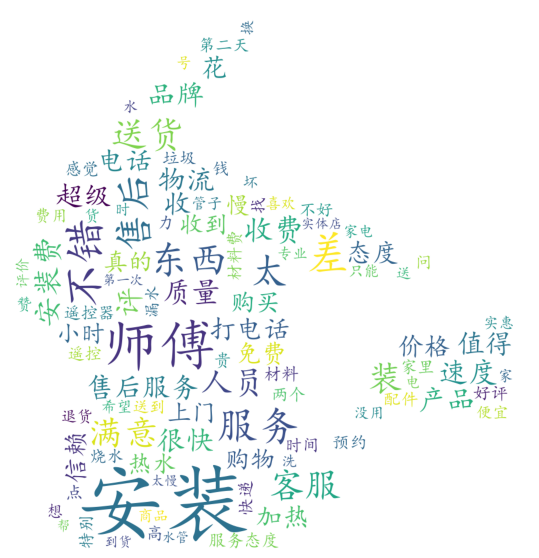

In [35]:
font=r"C:/Windows/Fonts/simkai.ttf"
backgroud_image=plt.imread('Z:/大四/python/week2/data/皮卡丘图片.jpg')
#生成词云对象
wordcloud_obj=WordCloud(font_path=font,
                       max_words=100,
                       background_color='white',
                       mask=backgroud_image)
#generate_from_frequencies:对应于已知词及对应的词频是多上，可以不进行分词统计
#cunter统计函数:作用在一个数组内，遍历所有元素，将每个元素出现的次数统计下来。
wordcloud_obj.generate_from_frequencies(Counter(review_long_clean.word.values)) 
plt.figure(figsize=(20,10))
#保存词云图
wordcloud_obj.to_file("商品评论分词后的(名词)词云图2.png")
plt.imshow(wordcloud_obj)
plt.axis('off')
plt.show

<Figure size 1440x720 with 0 Axes>

(-0.5, 952.5, 986.5, -0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

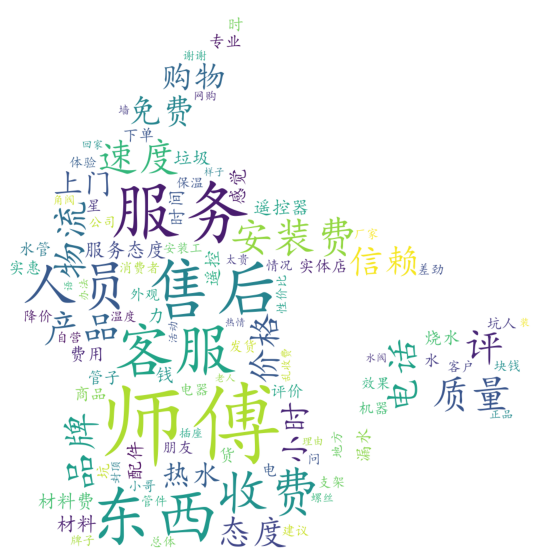

In [36]:
#词云图二，名词词云图
font=r"C:/Windows/Fonts/simkai.ttf"
backgroud_image=plt.imread('Z:/大四/python/week2/data/皮卡丘图片.jpg')
#生成词云对象
wordcloud_obj=WordCloud(font_path=font,
                       max_words=100,
                       background_color='white',
                       mask=backgroud_image)
#generate_from_frequencies:对应于已知词及对应的词频是多上，可以不进行分词统计
#cunter统计函数:作用在一个数组内，遍历所有元素，将每个元素出现的次数统计下来。
wordcloud_obj.generate_from_frequencies(Counter(n_review_long_clean.word.values))
plt.figure(figsize=(20,10))
#保存词云图
wordcloud_obj.to_file("商品评论分词后的词云图1.png")
plt.imshow(wordcloud_obj)
plt.axis('off')
plt.show

## 基于决策树的情感分类

## （一）模型的构建，构造特征空间和标签

In [37]:
review_long_clean

,index_content,word,nature,content_type,index_word
0,1,东西,ns,pos,1
1,1,收到,v,pos,2
2,1,这么久,r,pos,3
5,1,忘,v,pos,4
8,1,好评,v,pos,5
...,...,...,...,...,...
63814,1999,差,a,neg,10
63817,2000,两个,m,neg,1
63819,2000,送到,v,neg,2
63825,2000,未,d,neg,3


In [38]:
print(review_long_clean.index_content.unique()) #统计行数
#unique()返回的是一个无元素重复的数组或列表，并且从小到大

[   1    2    3 ... 1998 1999 2000]


In [39]:
review_long_clean.content_type.unique()

array(['pos', 'neg'], dtype=object)

In [40]:
# 构造特征空间和标签
Y=[]
for ind in review_long_clean.index_content.unique():#统计行数
    y=[word for word in review_long_clean.content_type[review_long_clean.index_content==ind].unique()]
    Y.append(y)
print(len(Y))

1964


In [41]:
review_long_clean.content_type[review_long_clean.index_content==1]

0     pos
1     pos
2     pos
5     pos
8     pos
11    pos
13    pos
14    pos
16    pos
17    pos
20    pos
22    pos
29    pos
30    pos
Name: content_type, dtype: object

In [42]:
for i in range(1,5):
    print(i)

1
2
3
4


In [43]:
review_long_clean.content_type[review_long_clean.index_content==188].unique()

array(['pos'], dtype=object)

In [44]:
X=[]
for ind in review_long_clean.index_content.unique():
    x=[word for word in review_long_clean.word[review_long_clean.index_content==ind].unique()]
  
    
    X.append(' '.join(x))
X  
print(len(X))

['东西 收到 这么久 忘 好评 品牌 值得 信赖 整体 个人感觉 不错 拥有',
 '安装 师傅 力 感谢',
 '安装 满意',
 '电 收到 自营 商品 发货 速度 品质 保障 安装 效果 宝贝 喜欢 冬天 小时 热水 值得 信赖 推荐',
 '几次 评价 产品 满意 加热 保温 时间 长 售后服务 特别 主动 打电话 询问 送货 情况 帮 安装 非常感谢 售后 大姐 服务 下次 购买',
 '物美价廉 特别 划算 加热 速度 家里 不错',
 '价格合理 配置 高 物美 价值',
 '老师 装 装修 中 试 希望',
 '五分 习惯 送 装 装修 中 吊顶 话 醉 遥控器 电池 安装 哥 车里 备用 给装 赠送 电动牙刷 空气 净化器 等待 配送 时间 冰箱 降 洗衣机 小厨 宝降 烟灶 套降 客服 上报 解决 电话 通知',
 '安装 小哥 工作 尽心 家 老房子 费力 不错 整栋 楼 热水 裙子 只能 装 点 赞 二个 一如既往 好用 品牌 质量',
 '前 天下 单买 用上 发现 街上 卖 便宜 店家 网上 他家 贵 老板 面',
 '冲着 以内 变频 级 能效 制冷 效果 不错',
 '购物 电器 问 型号 相识 家电 下线 安装 师傅 挺好 加热 很快 满意 走用 安装费 花元 喷头 槊 料 花 伞 麻烦',
 '物流 早上 送来 中午 安装 师傅 负责 效果 售后 确实',
 '满意 价格 产品质量 货运 安装 调试 工作人员 服务态度 售后服务',
 '收费 安装 速度 很快 管道 走 整齐 不错',
 '几天 想 晒 差点 忘 这款 喜欢',
 '安装 没用 不多 做 评价 凑 字',
 '不错 安装 人员 专业 值得 信赖',
 '家里 挺好用 在家 安装 很好',
 '装 太阳能 坏掉 换 电',
 '真心 感觉 不错 装 当晚 三个 冲凉 热水 没用 好评',
 '真心 不错 喜欢 品牌 赞',
 '安装 希望 没什么',
 '完美 不用 天天 太阳',
 '售后 预约 安装',
 '质量 不错 暖水 挺快 支持',
 '不错 物超所值',
 '凌晨 一点 下单 点 送到 员工 上门 安装 速度 效率 扛 特别 赞扬 师傅 专业 进门 换上 鞋套 过程 弄脏 地方 擦 干净 好评 试用 量 两三个 人用 合适',
 '东西 不错 价格 

1964


## (二)练集、测试集的划分

sklearn 的train_test_split函数将矩阵随机划分为训练集和测试子集，并返回划分好的训练集样本和测试集标签
    X_train,X_test, y_train, y_test =sklearn.model_selection.train_test_split(train_data,train_target,test_size=0.4, random_state=0,stratify=y_train)
train_data：所要划分的样本特征集
 train_target：所要划分的样本结果
test_size：样本占比，如果是整数的话就是样本的数量、
 random_state：是随机数的种子。
随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。
stratify是为了保持split前类的分布。比如有100个数据，80个属于A类，20个属于B类。如果train_test_split(... test_size=0.25, stratify = y_all), 那么split之后数据如下： 
training: 75个数据，其中60个属于A类，15个属于B类。 
testing: 25个数据，其中20个属于A类，5个属于B类。 

In [45]:
#第1步. 导入机器学习包
%pip install sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%pip install graphviz
import graphviz #简单数据结构图及子图



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [46]:
#第2步，词转向量，01矩阵

词转向量： 自然语言单词是离散信号，比如“我”、“ 爱”、“人工智能”。如何把每个离散的单词转换为一个向量？通常情况下，我们可以维护一个如 图2 所示的查询表。表中每一行都存储了一个特定词语的向量值，每一列的第一个元素都代表着这个词本身，以便于我们进行词和向量的映射（如“我”对应的向量值为 [0.3，0.5，0.7，0.9，-0.2，0.03] ）。给定任何一个或者一组单词，我们都可以通过查询这个excel，实现把单词转换为向量的目的，这个查询和替换过程称之为Embedding Lookup。 word2vec中单词向词向量的转换过程详解：将他们的one-hot向量作为word2vec的输入，通过word2vec训练低维词向量（word embedding）就ok了。不得不说word2vec是个很棒的工具，目前有两种训练模型（CBOW和Skip-gram），两种加速算法（Negative Sample与Hierarchical Softmax）。本文旨在阐述word2vec如何将corpus的one-hot向量（模型的输入）转换成低维词向量（模型的中间产物，更具体来说是输入权重矩阵），真真切切感受到向量的变化，不涉及加速算法。 ：https://blog.csdn.net/qq_16633405/article/details/80227805

CountVectorizer是属于常见的特征数值计算类，是一个文本特征提取方法。对于每一个训练文本，它只考虑每种词汇在该训练文本中出现的频率。

CountVectorizer会将文本中的词语转换为词频矩阵，它通过fit_transform函数计算各个词语出现的次数。

In [47]:
#第二步：训练集、测试集划分
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)
x_train
x_test

['跟得上 步伐 温度 显示 清晰可见 人性化 遥控器 东西 不用 站 高 用手 按了 安排 安装 师傅 热情 仔细 周全 赞',
 '安装 收费 太贵 角阀 简单 奇贵 清单 配件 没用',
 '送货 安装 热情 服务 不错 值得 信赖',
 '配套 东西 配 膨胀 螺丝 泄 压阀 安装工 上门 安装 时 消费者 出钱 购买 营销 方式 一种 骗 感觉 语',
 '满意',
 '坑 回家 安排 师傅 上门 强制 购买 辅材 条 胶管 弯头 要说 搞好 还好 新房子 打孔 挂上去 安装 工人 要买 走 态度 不好 亲们 到时候 店大欺客 没错',
 '同一天 格力空调 上午 安装 师傅 打电话 在家 父亲 配件 水管 接头 一种 买错 来来回回 一共 跑 躺 工具 客户 价格 收贵 包括 海尔 选择 介绍 用到 沟通 差 体验 几年 第一次 差评 下午 服务 满分 晚上 格力 询问 评分 评 电话 回访 生气 详情 来回 街上 回去 累 合适 下单 配送 售后 负责',
 '我家 奶奶家 支持 国货 喜欢 东西',
 '收到 一段时间 特地 评论 特别 没想到 花 钱 买来 实用 东西 物有所值 快递 很快 安装 师傅 到位 满意',
 '差 评 安装 太 垃圾 一米 几个 配件 想要 两百多 块 包装 电 果断 装 下次',
 '安装 挂 机器 差 评',
 '老家 家里 木地板 水泡 几天 图 赔偿',
 '就用 几个 东西 钱 服 差 评',
 '速度慢',
 '送货 速度 太慢',
 '差 评 商家 补 开发票 自营 不行 安装 师傅 盒子 拿走 选择',
 '一年 整体 不错 排水管 水滴 海尔',
 '送货 速度 东西 安装 师傅 乱收费 服务 太 差',
 '第二天 送到 很棒 安装 师傅 感谢',
 '服务 安装 人员 乱收 安装费 免费 变项 收取 高额 品质 临时工 底线 国货 当自强',
 '墙上 挂勾 升 够用',
 '到货 很快 安装 师傅 准时 服务态度 满意',
 '热水 机 价格 实惠 发货 速度 安装 师傅 细心',
 '太 坑人 安装 管件 太贵 价格 瞎 收费 挂 墙 架子 塑料 弯头 破 收 真',
 '简单 够用 设置 花里胡哨 高科技 华而不实 功能 简简单单 一款 洗澡 变得 遥控 一建 保温 省心',
 '家里 搬 新

['乱收费 官方 收费 标准 自备 材料 安装 需收 手工费 人员 指定 品牌 为由 不给 强行 安转员 走',
 '售后 工作人员 垃圾 要死 东西 找 凳子 弄 脏 呼呼 打眼 市尺 非 强行 窟窿 同意 门口 店里 油水 糊弄',
 '安装 配 两个 空间 位置 洗手间 外面 隔 一堵 墙 米 之内 下层 材料 请 人员 挂 墙壁 离开 管道 省 大洋 晚上 邻居 告诉 路上 嘀咕 早上 白跑 一趟 抠 业主 早 不来 几天 花 洒 漏水 郁闷',
 '烧水 速度 太慢 没什么 退货 太 麻烦 不退 星',
 '不错 送货 超快 原因 售后 贴心 安装 人员 沟通 安排 更改 时间',
 '质量 品质 保证 喜欢 送货 速度 很快',
 '东西 半个 月 掉价 保价 天 问 客服 解决 找 店里 差 差差 评',
 '产品 五星级 图片 美观',
 '购物 体验 送货 速度 配送 员 态度 超级 棒棒 机器 很漂亮 便宜 划算',
 '不错 送货 安装 师傅 敬业',
 '购买 动 安装 时 师傅 告诉 遥控器 坏 双十 一个多月 客服 只能 维修 换',
 '每次 洗澡 热水',
 '垃圾 售后服务 电话 第二天 装等 晚上 打电话 第三天 师傅 装',
 '老火 说好 包 安装 天才 来装 干 娘 还收 我块 安裝 费 星 物流',
 '无耻 不要脸 下单 降价 客户 确认 原价',
 '热 洗澡 够 电 棒 值得 购买',
 '服务态度 安装 技术 满意',
 '服务 太 差 电话 几次 没人 安装',
 '遥控 控制 温水 孩子 洗澡 不用 纠结 水温 合不 合适 不错',
 '不想 第一次 东西 憋屈 说好 安装费 超过 架子 单算 外面 价格 高 包 三年 去过 外边 找 安转 师傅 金牛 保 五十年 忍无可忍 只说 七块 一米 加 一截 安装 三百多 成 三百 网购 省钱 掉 坑里',
 '差 评 建议 购买 瓦 能用 浪费 钱 垃圾 更换 实体店',
 '安装 师傅 服务态度',
 '师傅 安装 收块 米 弯头 装完 共块 晕 明目张胆 乱收费 报价 贵 倍 走 材料 接',
 '品质 外观 美 性能 更是 厉害 喜欢',
 '速度 昨天 下单 到货 安装 很快 客服 态度 送货 师傅 服务 帮 送到 家 不错 外面 便宜 划算',
 '遥控 

In [48]:
#第三步 生成一个特征计算类对象
count_vec=CountVectorizer(binary=True)
x_train=count_vec.fit_transform(x_train)#将训练集中的词语转换为词频矩阵
x_test=count_vec.transform(x_test)#将测试集词语转换为词频矩阵
x_train
x_test

<1571x3429 sparse matrix of type '<class 'numpy.int64'>'
	with 14253 stored elements in Compressed Sparse Row format>

<393x3429 sparse matrix of type '<class 'numpy.int64'>'
	with 3192 stored elements in Compressed Sparse Row format>

In [49]:
#第四步 构建决策数
#生成一个决策树对象
dtc=tree.DecisionTreeClassifier(max_depth=5) #树深度：可以对这个参数可以调优，7，8，10
dtc.fit(x_train,y_train)
print('在训练集上的准确率:%.2f'%accuracy_score(y_train,dtc.predict(x_train)))

y_true=y_test
y_pred=dtc.predict(x_test)
print(classification_report(y_true,y_pred))
print('在测试集上的准确率:%.2f'%accuracy_score(y_true,y_pred))

DecisionTreeClassifier(max_depth=5)

在训练集上的准确率:0.72
              precision    recall  f1-score   support

         neg       0.63      0.96      0.76       197
         pos       0.91      0.44      0.59       196

    accuracy                           0.70       393
   macro avg       0.77      0.70      0.68       393
weighted avg       0.77      0.70      0.68       393

在测试集上的准确率:0.70


In [50]:
dot_data=tree.export_graphviz(dtc,
                              out_file=None,
                              feature_names=count_vec.get_feature_names())

In [51]:
graph=graphviz.Source(dot_data)
print(graph)

digraph Tree {
node [shape=box] ;
0 [label="不错 <= 0.5\ngini = 0.5\nsamples = 1571\nvalue = [790, 781]"] ;
1 [label="很快 <= 0.5\ngini = 0.49\nsamples = 1352\nvalue = [773, 579]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="信赖 <= 0.5\ngini = 0.48\nsamples = 1280\nvalue = [768, 512]"] ;
1 -> 2 ;
3 [label="实惠 <= 0.5\ngini = 0.469\nsamples = 1229\nvalue = [768, 461]"] ;
2 -> 3 ;
4 [label="放心 <= 0.5\ngini = 0.463\nsamples = 1207\nvalue = [767, 440]"] ;
3 -> 4 ;
5 [label="gini = 0.459\nsamples = 1191\nvalue = [767, 424]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 16\nvalue = [0, 16]"] ;
4 -> 6 ;
7 [label="没得说 <= 0.5\ngini = 0.087\nsamples = 22\nvalue = [1, 21]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 21\nvalue = [0, 21]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 51\nvalue = [0, 51]"] ;
2 -> 10 ;
11 [label="情况 <= 0.5\ngini = 0.129\nsamples = 72\nvalue = [5, 67]"] ;
1 -> 11 ;
12 [label="一百块 <= 0.

In [52]:
#第五步：画决策树，可以看到左边的样本比较多 samples=1280,1352
import os
cwd=os.getcwd()
dot_data=tree.export_graphviz(dtc
                              ,out_file=None
                              ,feature_names=count_vec.get_feature_names())
graph=graphviz.Source(dot_data)
graph.format='svg'
graph.render(cwd+'/tree',view=True)
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

## 五、情感分析

In [53]:
# 1. 导入情感评价库
pos_comment=pd.read_csv('Z:/大四/python/week2/data/正面评价词语（中文）.txt',header=None,sep='\n',encoding='utf-8')
neg_comment=pd.read_csv('Z:/大四/python/week2/data/负面评价词语（中文）.txt',header=None,sep='\n',encoding='utf-8')
pos_emotion=pd.read_csv('Z:/大四/python/week2/data/正面情感词语（中文）.txt',header=None,sep='\n',encoding='utf-8')
neg_emotion=pd.read_csv('Z:/大四/python/week2/data/负面情感词语（中文）.txt',header=None,sep='\n',encoding='utf-8')

In [55]:
pos_comment.shape
neg_comment.shape
pos_emotion.shape
neg_emotion.shape

(3743, 1)

(3138, 1)

(833, 1)

(1251, 1)

In [56]:
#2. 合并情感评价词，正面合并一起，负面合并一起
pos=pd.concat([pos_comment,pos_emotion],axis=0)#concat合并两个数据集功能
pos.shape
neg=pd.concat([neg_comment,neg_emotion],axis=0)#axis表示纵轴添加，axis=1表示横纵添加
neg.shape

(4576, 1)

(4389, 1)

In [57]:
#将词增加进去，使用数据框的合并
new_pos=pd.Series(['点赞'])
new_neg=pd.Series(['歇菜'])
positive=pd.concat([pos,new_pos],axis=0)
negative=pd.concat([neg,new_neg],axis=0)
positive.shape
negative.shape

(4577, 1)

(4390, 1)

In [58]:
positive.head()
negative.head()

,0
0,侻
1,俶傥
2,僄
3,劼
4,嫕


,0
0,僄
1,啰啰唆唆
2,啰啰嗦嗦
3,啰里啰唆
4,啰里啰嗦


In [59]:
#4.给情感词数据框添加列标题，和新增一个权重（情感词在评论词语中的个数） 每个正面词给1，负面词为-1
positive.columns=['review']
positive['weight']=1
positive.head()

,review,weight
0,侻,1
1,俶傥,1
2,僄,1
3,劼,1
4,嫕,1


In [60]:
negative.columns=['review']
negative['weight']=-1
negative.head()

,review,weight
0,僄,-1
1,啰啰唆唆,-1
2,啰啰嗦嗦,-1
3,啰里啰唆,-1
4,啰里啰嗦,-1


In [61]:
# 5. 正面负面合并形成一个大的带权重的情感词库
pos_neg=pd.concat([positive,negative],axis=0)
pos_neg.shape
pos_neg.head()
pos_neg.tail()

(8967, 2)

,review,weight
0,侻,1
1,俶傥,1
2,僄,1
3,劼,1
4,嫕,1


,review,weight
1247,黯然神伤,-1
1248,黯然销魂,-1
1249,威胁,-1
1250,欺骗,-1
0,歇菜,-1


In [62]:
# 6. 合并到review_long_clean中 会用用到merge函数，但是不像concat是按某行某列来合并，而是按照数据中具体的某一字段来连接的数据。
# 表联接，复制一个分词表，并于情感词进行表联接
review_long_clean

,index_content,word,nature,content_type,index_word
0,1,东西,ns,pos,1
1,1,收到,v,pos,2
2,1,这么久,r,pos,3
5,1,忘,v,pos,4
8,1,好评,v,pos,5
...,...,...,...,...,...
63814,1999,差,a,neg,10
63817,2000,两个,m,neg,1
63819,2000,送到,v,neg,2
63825,2000,未,d,neg,3


### pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
left_on:左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
how: One of ‘left’, ‘right’, ‘outer’, ‘inner’. 默认inner。inner是取交集，outer取并集。比如left：[‘A’,‘B’,‘C’];right[’'A,‘C’,‘D’]；inner取交集的话，left中出现的A会和right中出现的买一个A进行匹配拼接，如果没有是B，在right中没有匹配到，则会丢失。'outer’取并集，出现的A会进行一一匹配，没有同时出现的会将缺失的部分添加缺失值。、

left: 拼接的左侧DataFrame对象
right: 拼接的右侧DataFrame对象

In [63]:
data=review_long_clean.copy()
review_mltype=pd.merge(data,pos_neg,how='left',left_on='word',right_on='review') #表联接形成一个大数据表
review_mltype.shape  #how=left取的是左交接，一般是内交集
review_mltype.head()
review_mltype.tail(6)

(25210, 7)

,index_content,word,nature,content_type,index_word,review,weight
0,1,东西,ns,pos,1,NaN,NaN
1,1,收到,v,pos,2,NaN,NaN
2,1,这么久,r,pos,3,NaN,NaN
3,1,忘,v,pos,4,NaN,NaN
4,1,好评,v,pos,5,好评,1.0


,index_content,word,nature,content_type,index_word,review,weight
25204,1999,太,d,neg,9,NaN,NaN
25205,1999,差,a,neg,10,NaN,NaN
25206,2000,两个,m,neg,1,NaN,NaN
25207,2000,送到,v,neg,2,NaN,NaN
25208,2000,未,d,neg,3,NaN,NaN
25209,2000,送到,v,neg,4,NaN,NaN


In [64]:

review_mltype.shape[0]

25210

In [65]:
# 7 去掉情感词列（rewivew列删除）,同时对权重列值为nan用0代替
review_mltype=review_mltype.drop(['review'],axis=1)
#权重列值为nan用0代替
review_mltype=review_mltype.replace(np.nan,0)
review_mltype.head()

,index_content,word,nature,content_type,index_word,weight
0,1,东西,ns,pos,1,0.0
1,1,收到,v,pos,2,0.0
2,1,这么久,r,pos,3,0.0
3,1,忘,v,pos,4,0.0
4,1,好评,v,pos,5,1.0


## 8. 修正情感倾向，增加一个修正权重，主要解决中文词语中否否=肯定
规则：如有多重否定，那么奇数否定就是否定，偶数否定式肯定，看情感词前2个词，来判断否定的语气。如果在句首
则没有否词，如果在句子的第二词，则看前1个词来判断否定的语气

In [66]:
# 1. 导入否定词库
notdict=pd.read_csv('Z:/大四/python/week2/data/not.csv')
notdict.shape
notdict.head()

(21, 1)

,term
0,不
1,没
2,无
3,非
4,莫


In [67]:
#2. 增加一个权重列,得到一个带有权重的否定数据框
notdict['freq']=[1]*len(notdict)
notdict.head()

,term,freq
0,不,1
1,没,1
2,无,1
3,非,1
4,莫,1


In [68]:
#3. 准备一、给大的商品评论数据框增加修正的权重列
review_mltype['amend_weight']=review_mltype['weight']
review_mltype['id']=np.arange(0,review_mltype.shape[0])#记录原来词所在的位置顺序 从0到结束的行开始记起
#np.arange(0,1,1）起点从0到1，步长为1 
review_mltype.head()

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
0,1,东西,ns,pos,1,0.0,0.0,0
1,1,收到,v,pos,2,0.0,0.0,1
2,1,这么久,r,pos,3,0.0,0.0,2
3,1,忘,v,pos,4,0.0,0.0,3
4,1,好评,v,pos,5,1.0,1.0,4


In [69]:
#4. 准备二、只保留有权重值的行，去掉权重为0
only_review_mltype=review_mltype[review_mltype['weight']!=0] #只保留有感情词
only_review_mltype.head()

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
4,1,好评,v,pos,5,1.0,1.0,4
6,1,值得,v,pos,7,1.0,1.0,6
7,1,信赖,n,pos,8,1.0,1.0,7
12,1,值得,v,pos,13,1.0,1.0,12
17,2,感谢,v,pos,4,1.0,1.0,17


In [70]:
#重置索引
only_review_mltype.index=np.arange(0,only_review_mltype.shape[0])
only_review_mltype.shape
only_review_mltype.head()

(1526, 8)

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
0,1,好评,v,pos,5,1.0,1.0,4
1,1,值得,v,pos,7,1.0,1.0,6
2,1,信赖,n,pos,8,1.0,1.0,7
3,1,值得,v,pos,13,1.0,1.0,12
4,2,感谢,v,pos,4,1.0,1.0,17


In [71]:
# 查看第4条评论情感
i=4
review_i=review_mltype[review_mltype['index_content']==only_review_mltype['index_content'][i]]
review_i

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
14,2,安装,v,pos,1,0.0,0.0,14
15,2,师傅,nr,pos,2,0.0,0.0,15
16,2,力,n,pos,3,0.0,0.0,16
17,2,感谢,v,pos,4,1.0,1.0,17


In [72]:
# 修正权重
idex=only_review_mltype['id']
for i in range(0,only_review_mltype.shape[0]):
    
    review_i=review_mltype[review_mltype['index_content']==only_review_mltype['index_content'][i]] #找到第i条评论
    review_i.index=np.arange(0, review_i.shape[0])# 值等于index_word，给第i条评论赋值索引
    #设置第i条评论情感词的在该条评论中位置
    word_ind=only_review_mltype['index_word'][i]
    
    #第一种，在句首，则不用判断
    #第二种，在评论的第二个位置，要进行判断
    if word_ind==2: #是在第2个位置ne
    
        ne=sum([review_i['word'][word_ind-1] in notdict['term']]) #判读前一个词是在否定词库
        if ne==1:
            review_mltype['amend_weight']=-( review_mltype['weight'][index[i]])
    elif word_ind>2:
        ne=sum([word in notdict['term'] for word in review_i['word'][[word_ind-1,word_ind-2]]])
        if ne==1:
            review_mltype['amend_weight']=-( review_mltype['weight'][index[i]])
            

In [73]:
review_mltype.shape


(25210, 8)

In [74]:
review_mltype.tail()

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
25205,1999,差,a,neg,10,0.0,0.0,25205
25206,2000,两个,m,neg,1,0.0,0.0,25206
25207,2000,送到,v,neg,2,0.0,0.0,25207
25208,2000,未,d,neg,3,0.0,0.0,25208
25209,2000,送到,v,neg,4,0.0,0.0,25209


In [75]:
review_mltype[(review_mltype['weight']-review_mltype['amend_weight'])!=0]

,index_content,word,nature,content_type,index_word,weight,amend_weight,id


## 聚类分析
计算每条评论的情感值,要用分类汇总groupby,求修正权重之和

In [76]:
# 1. 分类汇总求修正权重之和
emotion_value=review_mltype.groupby('index_content',as_index=False)['amend_weight'].sum()
emotion_value.head()
emotion_value.tail()

,index_content,amend_weight
0,1,4.0
1,2,1.0
2,3,1.0
3,4,4.0
4,5,1.0


,index_content,amend_weight
1959,1996,0.0
1960,1997,-1.0
1961,1998,-1.0
1962,1999,1.0
1963,2000,0.0


In [77]:
# 2. 保存数据
emotion_value.to_csv('./1_emotion_value.csv',index=True,header=True)

In [78]:
# 3. 查看情感分析效果，去除掉不含有情感词的评论
conten_emotion_value=emotion_value.copy()
#去掉不含有情感词的评论
conten_emotion_value=conten_emotion_value[conten_emotion_value['amend_weight']!=0]
#修正评价标签（修正权重大于0标记为pos,小于0标记为neg）
conten_emotion_value['ml_type']=''
conten_emotion_value['ml_type'][conten_emotion_value['amend_weight']>0]='pos'
conten_emotion_value['ml_type'][conten_emotion_value['amend_weight']<0]='neg'
conten_emotion_value.shape
conten_emotion_value.head()
conten_emotion_value.tail()

<ipython-input-78-99f2b4a4126c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conten_emotion_value['ml_type'][conten_emotion_value['amend_weight']>0]='pos'
<ipython-input-78-99f2b4a4126c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conten_emotion_value['ml_type'][conten_emotion_value['amend_weight']<0]='neg'


(938, 3)

,index_content,amend_weight,ml_type
0,1,4.0,pos
1,2,1.0,pos
2,3,1.0,pos
3,4,4.0,pos
4,5,1.0,pos


,index_content,amend_weight,ml_type
1951,1988,-1.0,neg
1957,1994,-1.0,neg
1960,1997,-1.0,neg
1961,1998,-1.0,neg
1962,1999,1.0,pos


In [79]:
# 4. 合并到review_mltype大表用merge函数
# 删除conten_emotion表的修正权重列
conten_emotion_value=conten_emotion_value.drop(['amend_weight'],axis=1)
conten_emotion_value.shape
conten_emotion_value.head()

(938, 2)

,index_content,ml_type
0,1,pos
1,2,pos
2,3,pos
3,4,pos
4,5,pos


In [80]:
# 联接到review_mltype
review_mltype=pd.merge(review_mltype,conten_emotion_value,how='left',left_on='index_content',right_on='index_content')
#删除id列
review_mltype=review_mltype.drop(['id'],axis=1)
review_mltype.shape
review_mltype.head()

(25210, 8)

,index_content,word,nature,content_type,index_word,weight,amend_weight,ml_type
0,1,东西,ns,pos,1,0.0,0.0,pos
1,1,收到,v,pos,2,0.0,0.0,pos
2,1,这么久,r,pos,3,0.0,0.0,pos
3,1,忘,v,pos,4,0.0,0.0,pos
4,1,好评,v,pos,5,1.0,1.0,pos


In [81]:
# 保存
review_mltype.to_csv('./1_review_mltype.csv',index=True,header=True)

In [82]:
# 查看需要列,制作分类汇总表
cate=['index_content','content_type','ml_type']
data_type=review_mltype[cate].drop_duplicates()
confusion_matrix=pd.crosstab(data_type['content_type'],data_type['ml_type'],margins=True)
confusion_matrix

ml_type,neg,pos,All
content_type,,,
neg,379,58,437
pos,41,460,501
All,420,518,938


#### 从上面的交叉情感评论表可以看出，基于此表的情感分析的准确率到（89%），证明通过词表的情感分析去判断某产品的情感程度是有效

## 情感评论词云图

In [83]:
# 1拷贝一份数据框
data=review_mltype.copy()
data=data[data['amend_weight']!=0]
data.head()

,index_content,word,nature,content_type,index_word,weight,amend_weight,ml_type
4,1,好评,v,pos,5,1.0,1.0,pos
6,1,值得,v,pos,7,1.0,1.0,pos
7,1,信赖,n,pos,8,1.0,1.0,pos
12,1,值得,v,pos,13,1.0,1.0,pos
17,2,感谢,v,pos,4,1.0,1.0,pos


In [84]:
#2.分开提取正面情感评论和负面情感评论词
word_data_pos=data[data['ml_type']=='pos']
word_data_neg=data[data['ml_type']=='neg']
word_data_pos.head()
word_data_neg.tail()

,index_content,word,nature,content_type,index_word,weight,amend_weight,ml_type
4,1,好评,v,pos,5,1.0,1.0,pos
6,1,值得,v,pos,7,1.0,1.0,pos
7,1,信赖,n,pos,8,1.0,1.0,pos
12,1,值得,v,pos,13,1.0,1.0,pos
17,2,感谢,v,pos,4,1.0,1.0,pos


,index_content,word,nature,content_type,index_word,weight,amend_weight,ml_type
25069,1985,不好,d,neg,2,-1.0,-1.0,neg
25090,1988,贵,a,neg,9,-1.0,-1.0,neg
25160,1994,高,a,neg,4,-1.0,-1.0,neg
25188,1997,差评,n,neg,16,-1.0,-1.0,neg
25195,1998,漏电,nz,neg,3,-1.0,-1.0,neg


<Figure size 1440x720 with 0 Axes>

(-0.5, 952.5, 986.5, -0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

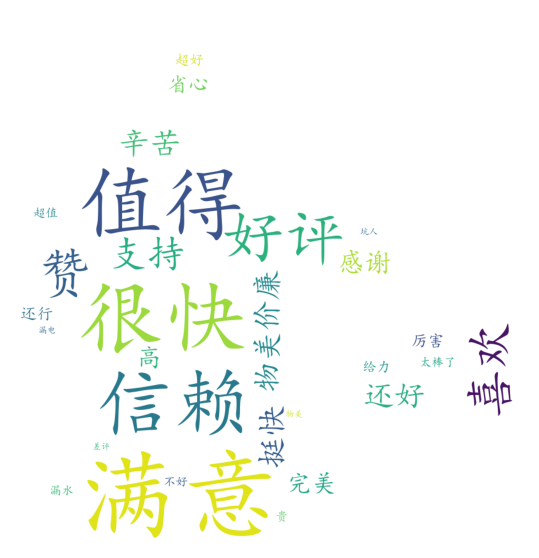

In [85]:
#3.分开制作情感平均词云图
#词云图二，名词词云图
font=r"E:/大四/python/week2/data/simkai.ttf"
backgroud_image=plt.imread('Z:/大四/python/week2/data/皮卡丘图片.jpg')
#生成词云对象
wordcloud_obj=WordCloud(font_path=font,
                       max_words=100,
                       background_color='white',
                       mask=backgroud_image)
#generate_from_frequencies:对应于已知词及对应的词频是多上，可以不进行分词统计
#cunter统计函数:作用在一个数组内，遍历所有元素，将每个元素出现的次数统计下来。
wordcloud_obj.generate_from_frequencies(Counter(word_data_pos.word.values))
plt.figure(figsize=(20,10))
#保存词云图
wordcloud_obj.to_file("商品评论分词后的词云图1.png")
plt.imshow(wordcloud_obj)
plt.axis('off')
plt.show

### 从上面正面情感评论词云图可知道：“满意”“信赖” “很快” “值得” “好评”等正面情感词出现的频率高，该区里面没有负面情感词语，可以看出情感分析能较好的将正面情感评论抽取出来

<Figure size 1440x720 with 0 Axes>

(-0.5, 952.5, 986.5, -0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

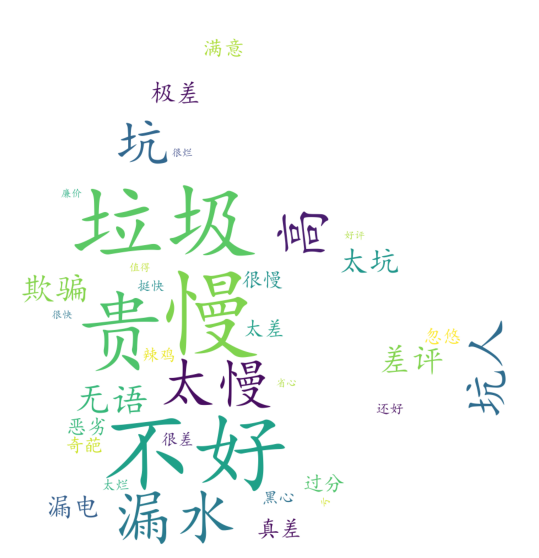

In [86]:
#3.分开制作情感平均词云图
#词云图二，名词词云图
font=r"E:/大四/python/week2/data/simkai.ttf"
backgroud_image=plt.imread('Z:/大四/python/week2/data/皮卡丘图片.jpg')
#生成词云对象
wordcloud_obj=WordCloud(font_path=font,
                       max_words=100,
                       background_color='white',
                       mask=backgroud_image)
#generate_from_frequencies:对应于已知词及对应的词频是多上，可以不进行分词统计
#cunter统计函数:作用在一个数组内，遍历所有元素，将每个元素出现的次数统计下来。
wordcloud_obj.generate_from_frequencies(Counter(word_data_neg.word.values))
plt.figure(figsize=(20,10))
#保存词云图
wordcloud_obj.to_file("商品评论分词后的词云图1.png")
plt.imshow(wordcloud_obj)
plt.axis('off')
plt.show

### 从上面负面情感评论词云图可以知道，“垃圾”“慢”“不好”“贵”等负面情感的频率较高，并没有参杂正面情感词，可以看出情感分析能较好的将负面情感评论抽取出来，还可以看出，客户主要对物流，价格，品质这三方面比较注重，左右建议商家要在这三负面啊进行改善。

## 三、基于LDA模型主题分析
    优点：不需要人工调式，用相对少的迭代找最优的主题结构
    模型过程：
        1.建立词典
        2.建立语料库
        3调用模块行数机进行主题寻优
        需要用到的库：
        1.gensim:主题挖掘，进行相关信息的提取
        2.itertools：迭代神器

In [3]:
import gensim


RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [2]:
#导包  models生成建模
from gensim import models,corpora
import itertools 

RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [ ]:
#1.建立词典（去重）
pos_dict=corpora.Dictionary([[i] for i in word_data_pos.word])  #正面情感评价词典
neg_dict=corpora.Dictionary([[i] for i in word_data_neg.word])  #负面情感评价词典
print(pos_dict)
print(neg_dict)

doc2bow()
可以接受不同长度的句子做训练样本，Doc2vec是一个无监督学习算法，该算法用于向量来表示文档，该模型的结构潜在的克服了词袋模型的缺点。

In [ ]:
#2.建立语料库   
pos_corpus=[pos_dict.doc2bow(j) for j in[[i] for i in word_data_pos.word]] #建立正面情感评价语料库
neg_corpus=[pos_dict.doc2bow(j) for j in[[i] for i in word_data_neg.word]] #建立负面情感评价语料库
len(word_data_pos.word)
len(pos_corpus)
len(pos_dict)
pos_corpus

主题寻优
    1.构造主题寻优函数（余弦函数）
    2.主题寻优函数（LDA_K）

In [ ]:
#1.构造余弦函数
def cos(vector1,vector2):
    '''
    余弦相似度函数
    '''
    dot_product=0.0
    normA=0.0
    normB=0.0
    for a,b in zip(vector1,vector2):
        dot_product+=a*b
        normA+=a**2
        normB+=b**2
        if normA==0.0 or normB==0.0:
            return None
        else:
            return (dot_product/((normA*normB)**0.5))

In [ ]:
#主题数寻优
#这个函数可以重复调用，解决其他项目的问题

def LDA_k(x_corpus,x_dict):
    '''
    函数功能：
    '''
    #初始化平均余玄相似度
    mean_similarity=[]
    mean_similarity.append(1)
    
    #循环生成主题并计算主题间相似度
    for i in np.arange(2,11):
        lda=models.LdaModel(x_corpus,num_topics=i,id2word=x_dict) #LDA模型训练
        
        for j in np.arange(i):
            term=lda.show_topics(num_words=50)
        
        #提取各主题词
        top_word=[] #shape=(i,50)
        for k in np.arange(i):
            top_word.append( [''.join(re.findall('"(.*)"',i)) for i in term[k][1].split('+')]) #列出所有词
        
        #构造词频向量
        word=sum(top_word,[]) #列车所有词
        unique_word=set(word) #去重
        
        #构造主题词列表，行表示主题号，列表示各主题词
        mat=[] #shape=(i,len(unique_word))
        for j in np.arange(i):
            top_w=top_word[j]
            mat.append( tuple([ top_w.count(k) for k in unique_word ])) #统计list中元素的频次，返回元组
        
        #两两组合。方法一
        p=list(itertools.permutations(list(np.arange(i)),2)) #返回可迭代对象的所有数学全排列方式。
        y=len(p) # y=i*(i-1)
        top_similarity=[0]
        for w in np.arange(y):
            vector1=mat[p[w][0]]
            vector2=mat[p[w][1]]
            top_similarity.append(cos(vector1,vector2))

#        #两两组合，方法二
#        for x in range(i-1):
#            for y in range(x,i):
            
        #计算平均余玄相似度
        mean_similarity.append(sum(top_similarity)/ y)
    return mean_similarity


In [ ]:
#计算主题平均余玄相似度

pos_k=LDA_k(pos_corpus,pos_dict)
neg_k=LDA_k(neg_corpus,neg_dict)

pos_k
neg_k


In [ ]:
pd.Series(pos_k,index=range(1,11)).plot()
plt.title('正面评论LDA主题数寻优')
plt.show()

In [ ]:
plt.rcParams['font.sans-serif'] = ['Simhei'] # 解决中文乱码问题


In [ ]:
pd.Series(neg_k,index=range(1,11)).plot()
plt.title('负面评论LDA主题数寻优')
plt.show()

### 对于正面评论数据，当主题为2或者3，主题间的余弦相似度就达到最低，因此，对正面评论数据做LDA，可以选择主题为3，对于负面数据LDA，可以选择主题三

In [ ]:
pos_lda=models.LdaModel(pos_corpus,num_topics=2,id2word=pos_dict)
neg_lda=models.LdaModel(neg_corpus,num_topics=2,id2word=neg_dict)

pos_lda.print_topics(num_topics=10)
neg_lda.print_topics(num_topics=10)

In [ ]:
plt.rcParams['font.sans-serif'] = ['Simhei'] # 解决中文乱码问题
